### Importing necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_image(img : np.array):
    plt.figure(figsize = (6, 6))
    plt.imshow(img, cmap = 'gray')
    
def plot_two_imgages(img1 : np.array, img2 : np.array):
    _, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].imshow(img1, cmap = 'gray')
    ax[1].imshow(img2, cmap = 'gray')

### Loading the Data

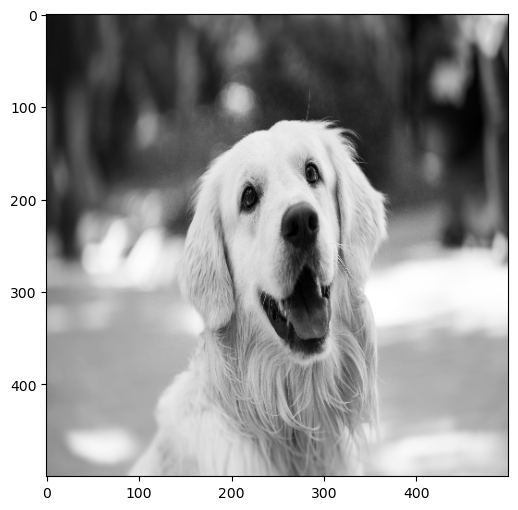

In [9]:
# reading a color image using cv2
img = cv2.imread('dog.jpg')

# converting the color image to gray scale image so as to pass it to convolve function
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# reshaping the image to get even shape
resized_image = cv2.resize(gray_img, (500, 500)) 

plot_image(img = resized_image)

### Declaring Convolution Filters

In [4]:
sharpen = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

blur = np.array([[0.0625, 0.125, 0.0625],
                [0.125, 0.25, 0.125],
                [0.0625, 0.125, 0.0625]])

outline = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

### Implementing a convolution neural network from scratch

In [5]:
def calculate_target_size(img_size : int, kernel_size : int) -> int:
    num_pixels = 0
    
    for i in range(img_size):
        added = i + kernel_size
        if added <= img_size:
            num_pixels += 1
    
    return num_pixels

In [6]:
calculate_target_size(img_size = 224, kernel_size = 3)

222

In [11]:
def convolve_image(img: np.array, kernel: np.array) -> np.array:
    tgt_size = calculate_target_size(img_size = img.shape[0], kernel_size = kernel.shape[0])
    
    convolved_img = np.zeros([tgt_size, tgt_size])
    k = kernel.shape[0]
    
    for i in range(tgt_size):
        for j in range(tgt_size):
            mat = img[i : i + k, j : j + k]
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
    
    return convolved_img

In [12]:
img_sharpened = convolve_image(img = resized_image, kernel = sharpen)
img_sharpened

array([[ 19.,  21.,  23., ..., 202., 185., 174.],
       [ 20.,  22.,  18., ..., 195., 187., 181.],
       [ 20.,  22.,  19., ..., 200., 173., 177.],
       ...,
       [140., 144., 145., ..., 193., 191., 188.],
       [144., 141., 143., ..., 191., 189., 192.],
       [142., 139., 141., ..., 189., 187., 190.]])

In [13]:
img_sharpened.shape

(498, 498)

### Sharpened Image

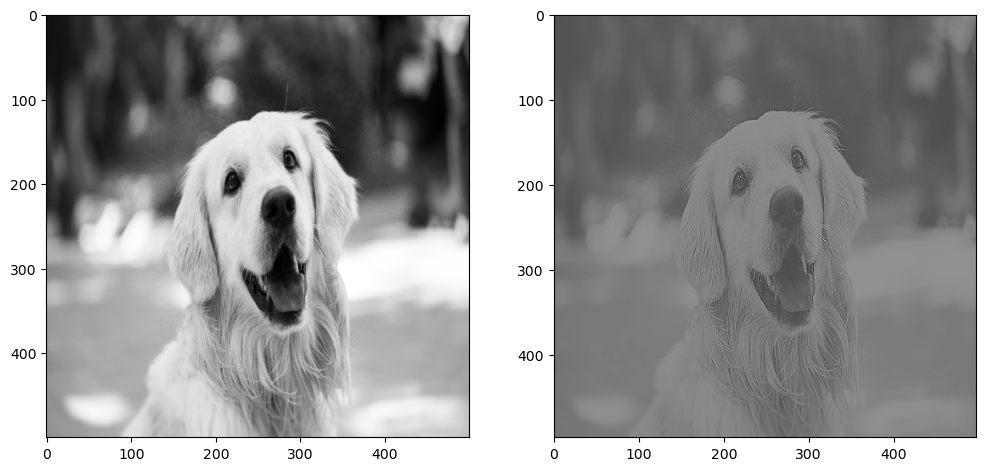

In [14]:
plot_two_imgages(img1 = resized_image, img2 = img_sharpened)

#### Here in the above convolved image on the right we are replacing negative values with zeros

In [15]:
def negative_to_zero(img : np.array):
    img = img.copy()
    img[img < 0] = 0
    return img

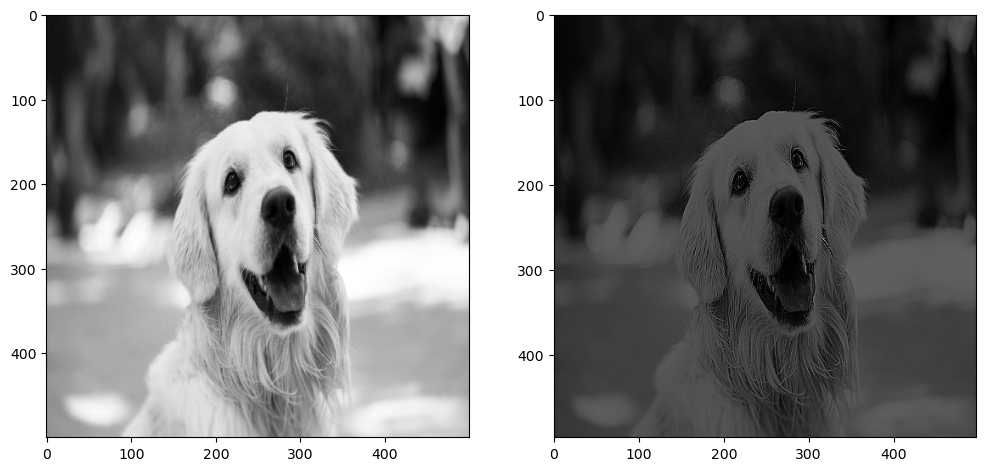

In [16]:
plot_two_imgages(img1 = resized_image, img2 = negative_to_zero(img_sharpened))

### Image Blurred

In [17]:
img_blurred = convolve_image(img = resized_image, kernel = blur)
img_blurred

array([[ 21.375 ,  21.    ,  20.6875, ..., 197.125 , 188.6875, 181.1875],
       [ 21.25  ,  20.8125,  20.375 , ..., 194.6875, 186.    , 178.5625],
       [ 21.25  ,  20.75  ,  20.25  , ..., 191.5625, 182.5   , 174.75  ],
       ...,
       [142.25  , 142.9375, 143.75  , ..., 191.8125, 191.0625, 190.375 ],
       [141.625 , 142.1875, 142.9375, ..., 190.9375, 190.1875, 189.625 ],
       [140.875 , 141.4375, 142.1875, ..., 190.1875, 189.4375, 188.875 ]])

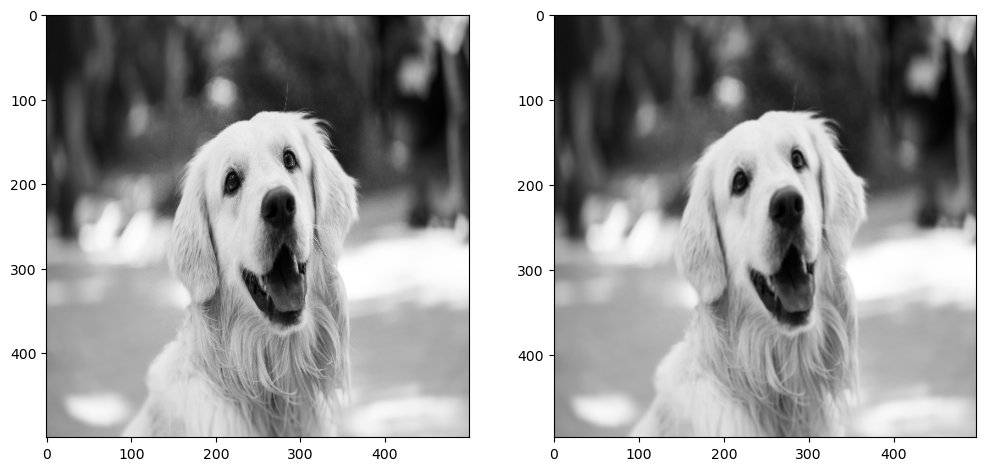

In [18]:
plot_two_imgages(img1 = resized_image, img2 = img_blurred)

### Applying Outline Filter

In [19]:
img_outline = convolve_image(img = resized_image, kernel = outline)
img_outline

array([[ -4.,   0.,   3., ...,  10.,  -8., -13.],
       [ -3.,   2.,  -4., ...,   5.,  -1.,   5.],
       [ -3.,   3.,  -3., ...,  16., -16.,   2.],
       ...,
       [ -2.,   0.,   3., ...,   2.,  -1.,  -4.],
       [  4.,  -2.,   1., ...,   1.,  -2.,   4.],
       [  1.,  -5.,  -2., ...,  -2.,  -5.,   1.]])

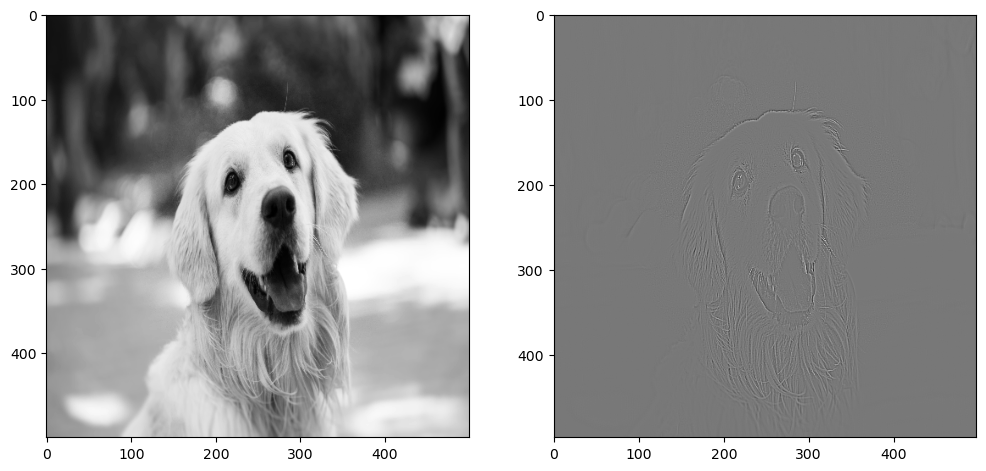

In [20]:
plot_two_imgages(img1 = resized_image, img2 = img_outline)

#### Here in the above convolved image on the right we are replacing negative values with zeros

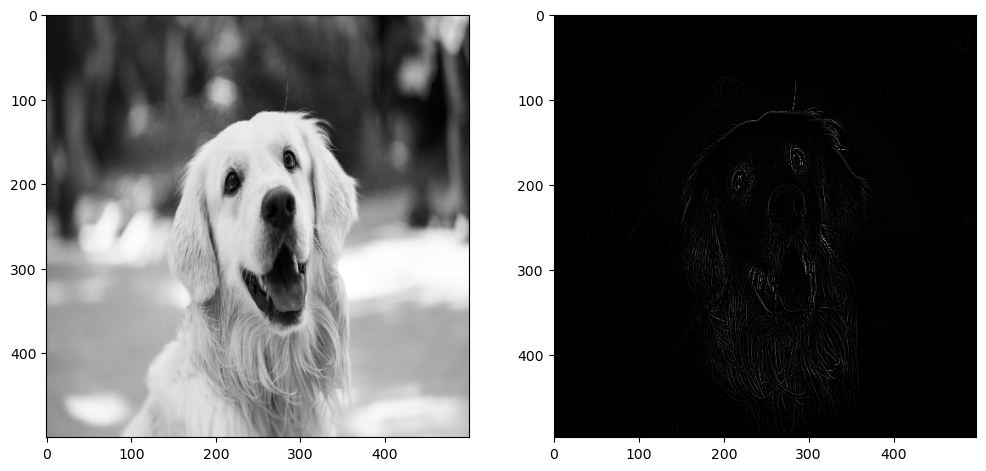

In [21]:
plot_two_imgages(img1 = resized_image, img2 = negative_to_zero(img_outline))